# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [ ]:
# YOUR CODE HERE
iris_data = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/iris/iris.tsv.gz", sep="\t", compression="gzip")
print(iris_data.head()) # test to make sure loaded correctly
iris_data.sample(10)

   sepal-length  sepal-width  petal-length  petal-width  target
0           6.7          3.0           5.2          2.3       2
1           6.0          2.2           5.0          1.5       2
2           6.2          2.8           4.8          1.8       2
3           7.7          3.8           6.7          2.2       2
4           7.2          3.0           5.8          1.6       2


,sepal-length,sepal-width,petal-length,petal-width,target
11,4.9,3.1,1.5,0.1,0
87,4.7,3.2,1.3,0.2,0
32,6.4,3.1,5.5,1.8,2
45,6.3,3.3,6.0,2.5,2
38,6.7,3.1,4.4,1.4,1
58,5.1,3.8,1.5,0.3,0
51,6.6,2.9,4.6,1.3,1
23,6.2,2.9,4.3,1.3,1
46,6.7,3.3,5.7,2.5,2
37,5.7,2.8,4.1,1.3,1


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [ ]:
# YOUR CODE HERE
print(iris_data.columns)
# Column 1: "sepal-length" details the length of the plant instance's sepal, a protective plant structure of the bud. This column has measurements in centimeters for each instance and is a continuous variable. These are a feature to be used in classification of the target variable
# Column 2: "sepal-width" details the width of the plant instance's sepal. This column also has values in centimeters and is also a continuous variable. This is also a feature to be used in classification of the target variable. 
# Column 3: "petal-length" lists the length of each instance of the petal of each plant. The petal is the more delicate and often more colored part of the plant. Each measurement is in centimeters and this variable is continuous. This column is a feature for classification of the target variable.
# Column 4: "petal-width" lists the width of each instance's measurement in centimeters. This is a continuous variable and also a feature to be used in classification of the target variable. 
# Column 5: "target" is obvioulsy the target variable. In this case the target variable is to classsify each instance of irises into one of 3 classes of iris: Iris Setosa, Iris Versicolour, or Iris Virginica. This column has values 0, 1, and 2 to denote each classification into the 3 classes of iris.This is a categorical variable.  

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'target'], dtype='object')


YOUR ANSWERS HERE

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

array([[<Axes: title={'center': 'sepal-length'}>,
        <Axes: title={'center': 'sepal-width'}>],
       [<Axes: title={'center': 'petal-length'}>,
        <Axes: title={'center': 'petal-width'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

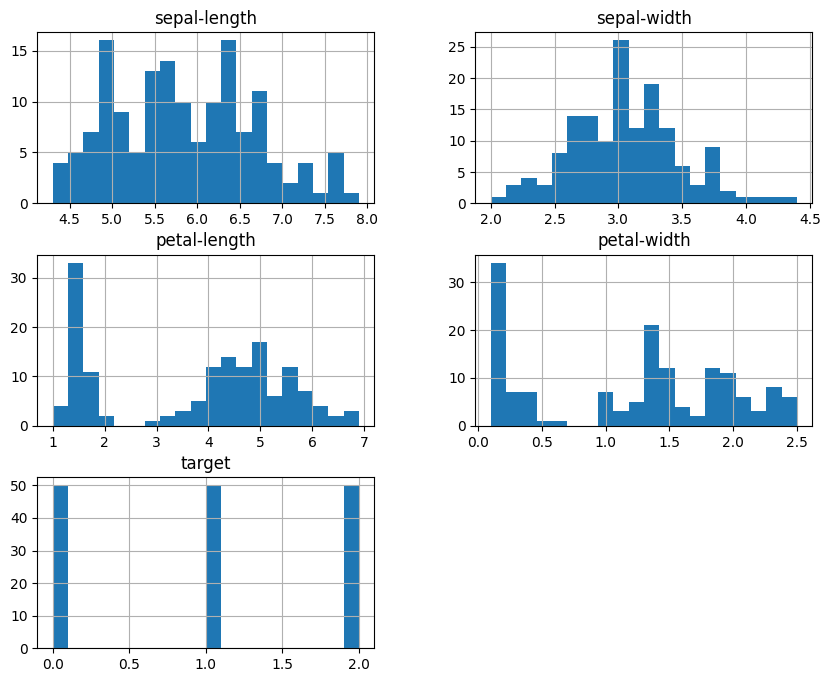

In [ ]:
# YOUR CODE HERE
iris_data.hist(figsize=(10, 8), bins=20)
#"sepal-length" is best described as a univariate, trimodal distribution positively skewed. It has 3-4 clear peaks in the histogram.
#"sepal-width" appears to be a mostly normal distribution with some slight positive skew. 
# "petal-length" is best described as a bimodal, univariate, positive skew distribution. It measures one variable, has 2 distinct groupings and is skewed left.
# "petal width" is best described as a bimodal, univariate, positive skew distribution as well. It measures one variable, has 2 distinct groupings, and skewed left.
# "target" is best described as a uniform distribution as each possible value is represented the same amount of times. 

YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

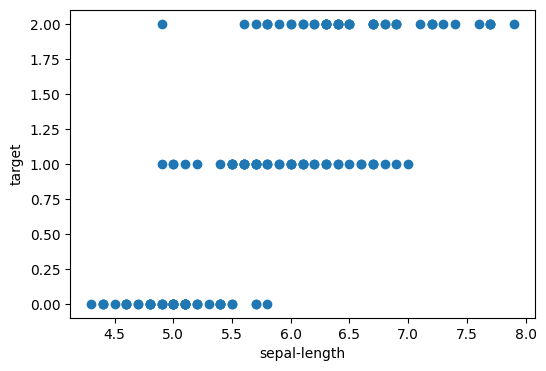

sepal-length and target: Dep


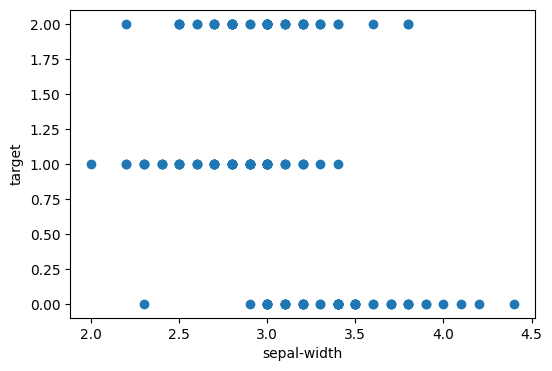

sepal-width and target: Dep


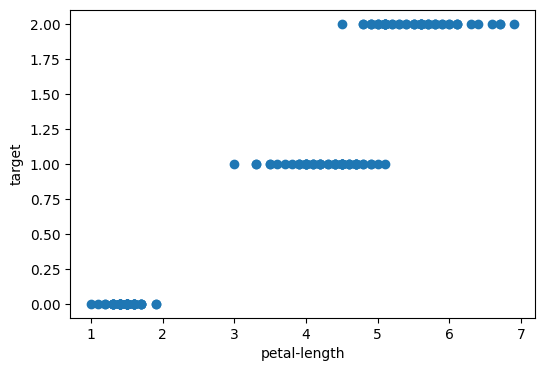

petal-length and target: Dep


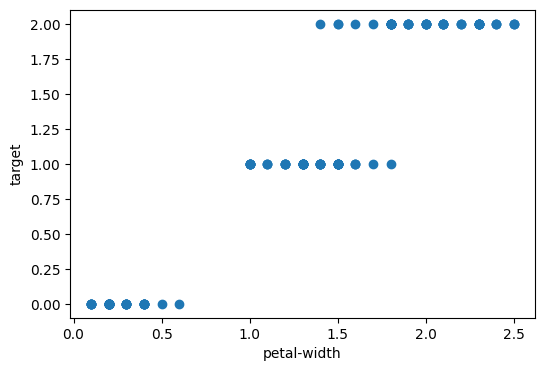

petal-width and target: Dep


In [61]:
# YOUR CODE HERE
input_cols = iris_data.columns[:-1]

for col in input_cols:
    plt.figure(figsize=(6,4))
    plt.scatter(iris_data[col], iris_data['target'])
    plt.xlabel(col)
    plt.ylabel('target')
    plt.show()

    corr = iris_data[[col, 'target']].corr().iloc[0,1]
    
    if abs(corr) < 0.1:
        print(f"{col} and {'target'}: Ind")
    else:
        print(f"{col} and {'target'}: Dep")

# All pairs of the input columns and the target variable are dependent. This is the case because each parameter (input) was used in clasifying the plant, or the target. Each measurement directly correllates to what the target variable will be. 


YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

Means squared error 0.046385088311226945


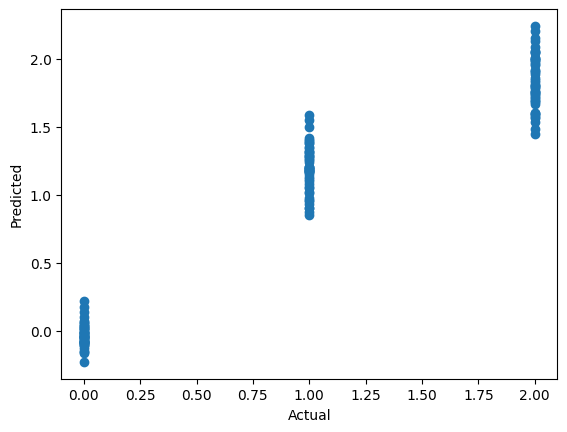

In [35]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression 

x5 = iris_data.drop(columns=['target'])
y = iris_data['target']

model_lsr = LinearRegression()
model_lsr.fit(x5,y)

pred_target = model_lsr.predict(x5)

plt.scatter(y, pred_target)
plt.xlabel('Actual')
plt.ylabel('Predicted')

MSE = np.mean((y - pred_target) ** 2)
print('Means squared error', MSE)

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [ ]:
# YOUR CODE HERE
input_cols = iris_data.columns[:-1]

for col in input_cols:
    X = iris_data[[col]]
    y = iris_data['target']

    model_each_input = LinearRegression()
    model_each_input.fit(X,y)
    y_pred6 = model_each_input.predict(X)

    MSE6 = np.mean((y - y_pred6) ** 2)
    print(col, MSE6)

# The input column with the best linear model of the target by itself is the petal width as it has the lowest means squared error of the inputs. Petal width is just a bit higher than the model in problem 5, so just a bit less of a fit.


sepal-length 0.2583986123119253
sepal-width 0.5493765900582834
petal-length 0.06621216537347081
petal-width 0.05678463583919234


YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

(0.0, 4.0)

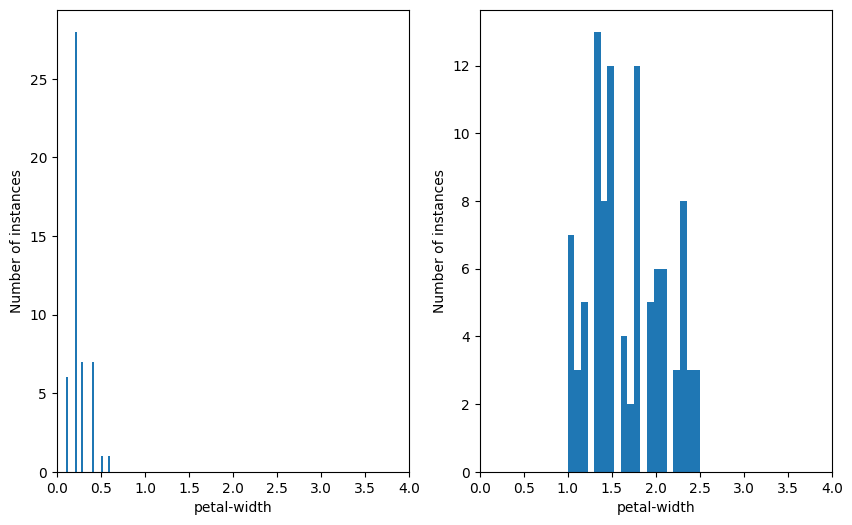

In [70]:
# YOUR CODE HERE
#plt.scatter(iris_data["petal-length"], iris_data["petal-width"])
# 2 to 2.8ish good for seperator
x7 = 'petal-length'
y7 = 'petal-width'
t = 2.4
h1 = iris_data[iris_data[x7] < t][y7]
h2 = iris_data[iris_data[x7] >= t][y7]


plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.hist(h1, bins=20)
plt.xlabel(y7)
plt.ylabel("Number of instances")
plt.xlim(0,4)

plt.subplot(1,2,2)
plt.hist(h2,bins=20)
plt.xlabel(y7)
plt.ylabel("Number of instances")
plt.xlim(0,4)

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [ ]:
# YOUR CODE HERE


YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
# YOUR CODE HERE
inputs9 = iris_data.iloc[:, :-1]
corr_matrix = inputs9.corr()
corr_matrix
# The pair with the highest correlation are 'petal-width' and 'petal-length'. 

,sepal-length,sepal-width,petal-length,petal-width
sepal-length,1.000000,-0.109369,0.871754,0.817954
sepal-width,-0.109369,1.000000,-0.420516,-0.356544
petal-length,0.871754,-0.420516,1.000000,0.962757
petal-width,0.817954,-0.356544,0.962757,1.000000


YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

<function matplotlib.pyplot.show(close=None, block=None)>

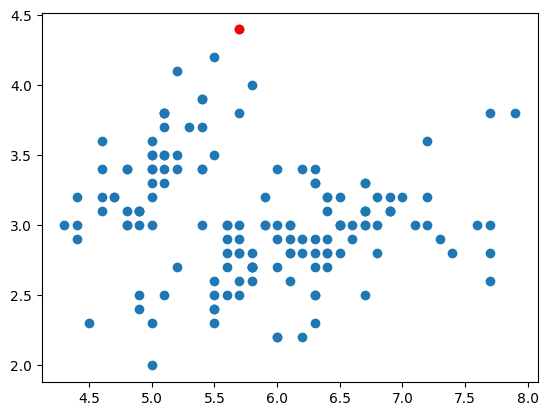

In [87]:
# YOUR CODE HERE
X = iris_data.iloc[:, :-1]

z = (X - X.mean()) / X.std()

max_z = np.abs(z).max(axis=1)
idx = max_z.idxmax()

outlier10 = iris_data.loc[idx]
outlier10

#This row was picked by finding the maximum absolute value of a row's z-score, or how many standard deviations away from the mean a point is. Basically finding which row is farthest from the mean, as outliers are defined as irregular data points and from from the mean. 
x10 = iris_data['sepal-length']
y10 = iris_data['sepal-width']
i10 = 118
plt.scatter(x10,y10)
plt.scatter(x10[i10], y10[i10], color='red')
plt.show

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

https://chatgpt.com/share/692d36df-0240-8002-965b-9c01d12f9631 